# Лабораторная работа 2
Визуализация данных

Выполнила: Кривоконева Екатерина, группа 6133

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 

## 0 Загрузка датасета

In [2]:
data = pd.read_csv('data/googleplaystore.csv')
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


`googleplaystore.csv` содержит подробную информацию о приложениях в Google Play. 

Числовые признаки:

- Rating - Общий пользовательский рейтинг приложения 
- Reviews - Количество отзывов пользователей о приложении 

Категориальные признаки:

- App - Название приложения
- Category - Категория, к которой относится приложение
- Size - Размер приложения 
- Installs - Количество загрузок/установок приложения пользователями 
- Type - Платный или бесплатный
- Price - Стоимость приложения 
- Content - Возрастная группа, на которую ориентировано приложение
- Genres - Жанр приложения (помимо основной категории)

Ссылка на датасет: https://www.kaggle.com/lava18/google-play-store-apps



### Предобработка данных

Заменим Nan в столбце Rating средним значением по этому признаку:

In [3]:
data.Rating = data.Rating.fillna(data.Rating.mean())

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Далее добавим еще немного числовых признаков. 

Удалим строки которые содержат ошибочные значения: 

In [5]:
idx_list = []

for i in range(data.shape[0]):
  if not data.iloc[i, data.columns.get_loc('Reviews')].isdigit():
    idx_list.append(i)

data = data.drop(data.index[idx_list])
data.Reviews = data.Reviews.astype('int')

Уберем знак доллара и оставим только цену в долларах:

In [6]:
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data.Price = data.Price.astype('float32')

Возьмем в качестве значений столбца Installs числа без плюса:

In [7]:
data.Installs = data.Installs.apply(lambda x: x.split('+')[0])
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.astype('int')

Превратим значения из Size в числа с плавающей точкой:

In [8]:
modified_size = []
for item in list(data.Size):
    if "M" in item:
        modified_size.append(float(item.upper().split("M")[0]))
    elif "K" in item:
        modified_size.append(float(item.upper().split("K")[0]) / 0.001)
    else:
        modified_size.append(0.0)
data['Size'] = modified_size

data.Size = data.Size.astype('float32')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float32
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float32
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float32(2), float64(1), int64(2), object(8)
memory usage: 1.1+ MB


## 1 Matplotlib


### 1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab


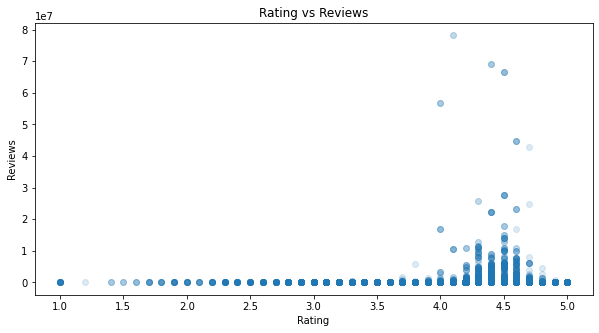

In [10]:
mpl.rcParams['agg.path.chunksize'] = 10000

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data.Rating, data.Reviews, alpha=0.15)
ax.set(title='Rating vs Reviews', xlabel='Rating', ylabel='Reviews')
plt.show()

### 1.2 Построить несколько суб-графиков на одном графике используя .subplot.

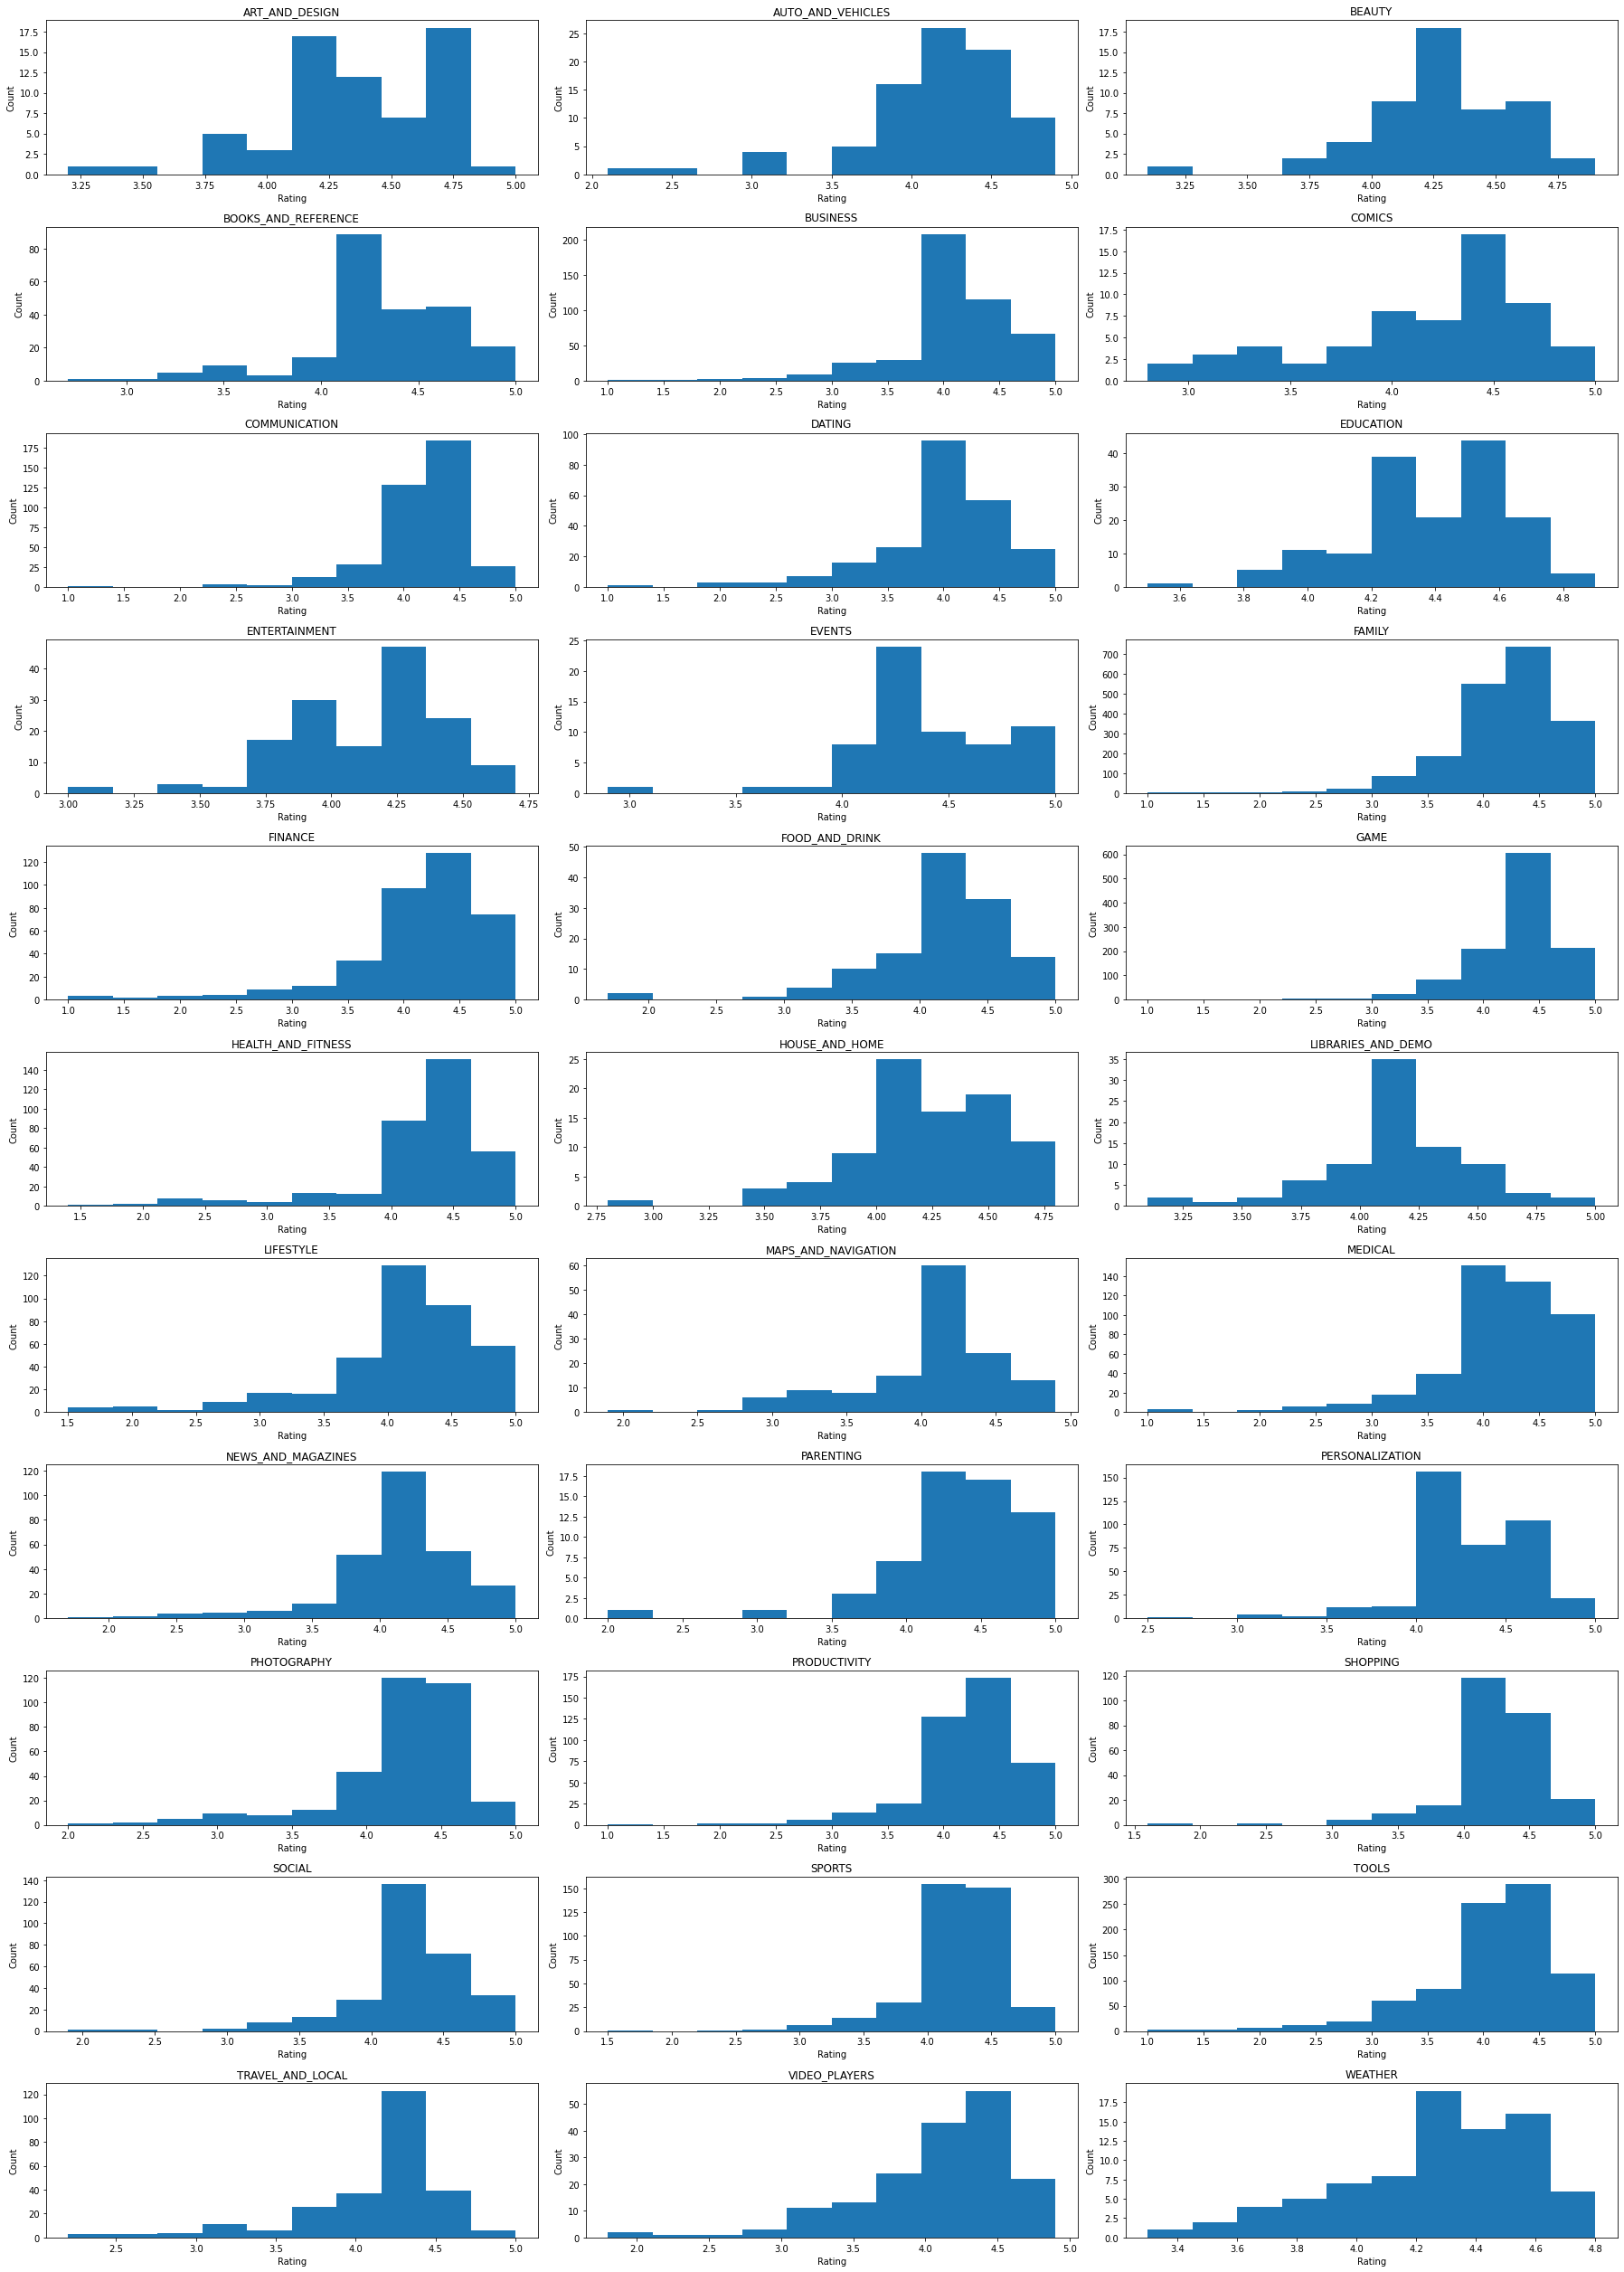

In [11]:
count=1
plt.figure(figsize=(25, 35))
for i in np.unique(data.Category.values):
    plt.subplot(11, 3, count)
    plt.hist(data[data.Category == i].Rating.values)
    plt.title(i)
    plt.xlabel("Rating")
    plt.ylabel("Count")
    count = count + 1
plt.tight_layout()

## 2  На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) 
Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

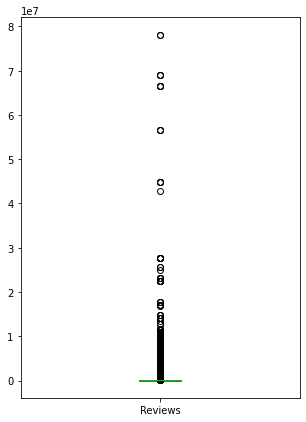

In [12]:
data.Reviews.plot.box(by=[['Rating']], figsize=(5, 7))
plt.show()

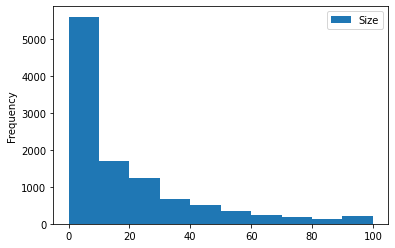

In [13]:
data.plot(y='Size', kind='hist')
plt.show()

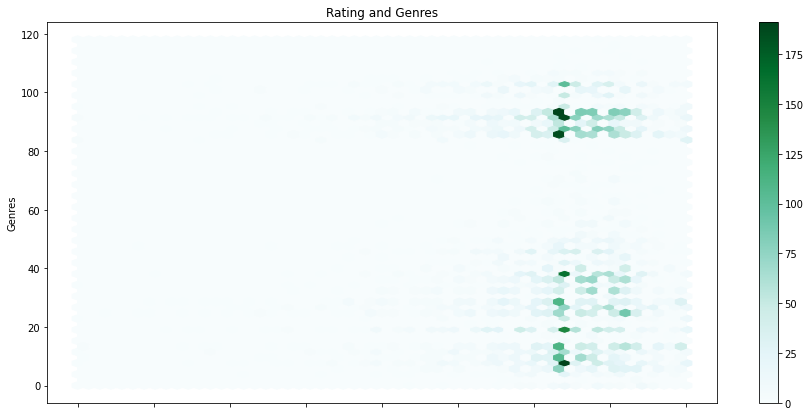

In [15]:
df = data
df['Genres'] = pd.factorize(data['Genres'])[0]

df.plot.hexbin(
    x='Rating',
    y="Genres",
    gridsize=55,
    title='Rating and Genres',
    figsize=(15, 7),
    reduce_C_function=np.max,
    )
plt.show()

## 3  Seaborn



### 3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

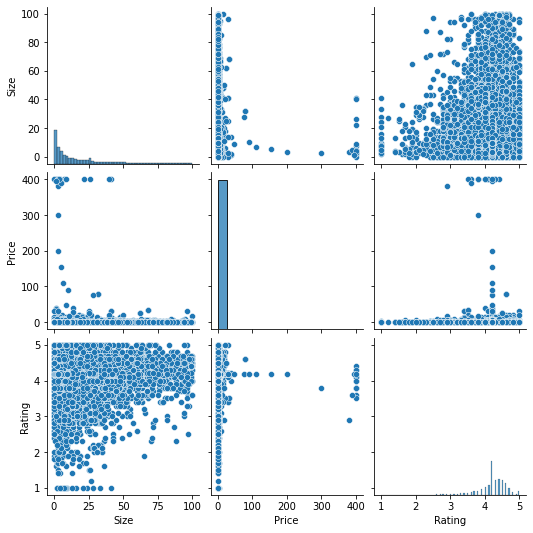

In [ ]:
sns.pairplot(data[['Size', 'Price', 'Rating']])
plt.show()

### 3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

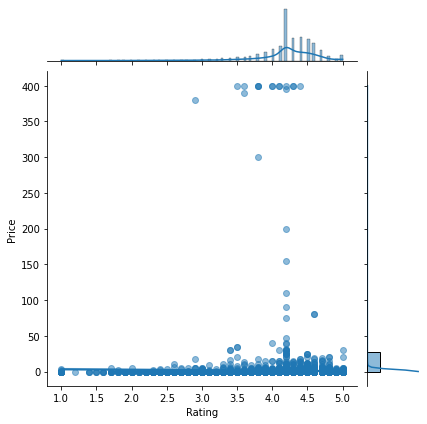

In [ ]:
sns.jointplot(data=data, 
              x="Rating", 
              y="Price", 
              kind="reg",
              joint_kws = {'scatter_kws':dict(alpha=0.5)})
plt.show()

### 3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

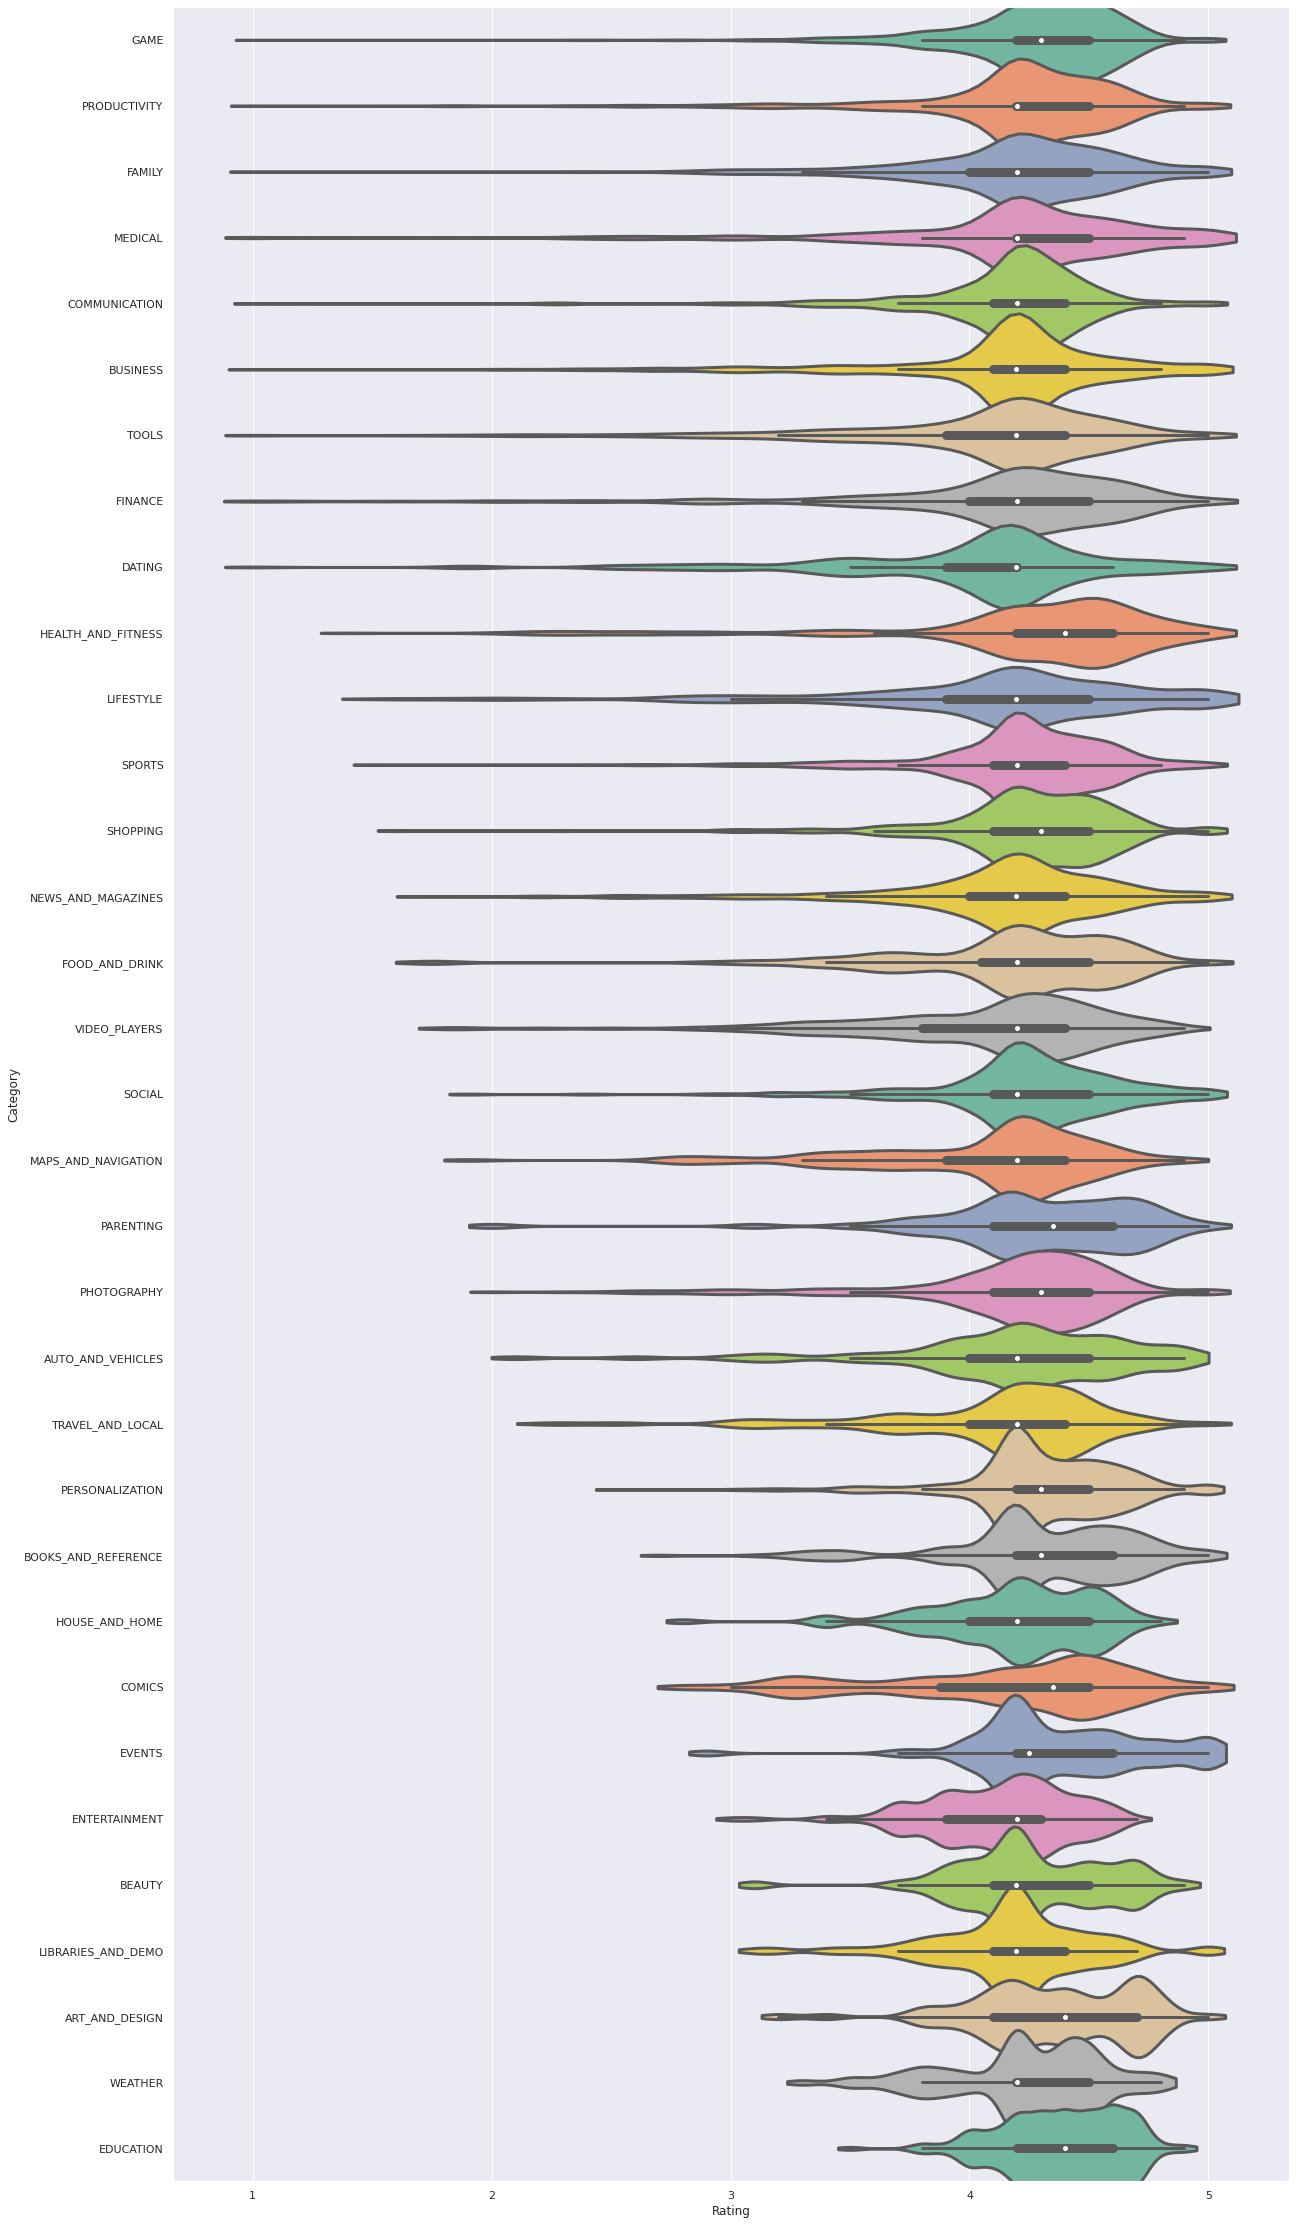

In [ ]:
data = data.sort_values(by=['Rating'])
data.head(2)
sns.set(rc={"figure.figsize":(20, 40)})
sns.violinplot(data=data, 
               palette="Set2", 
               x='Rating',
               y='Category',
               bw=0.2, 
               cut=1, 
               linewidth=3,
               width=2
               )
plt.show()

### 3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


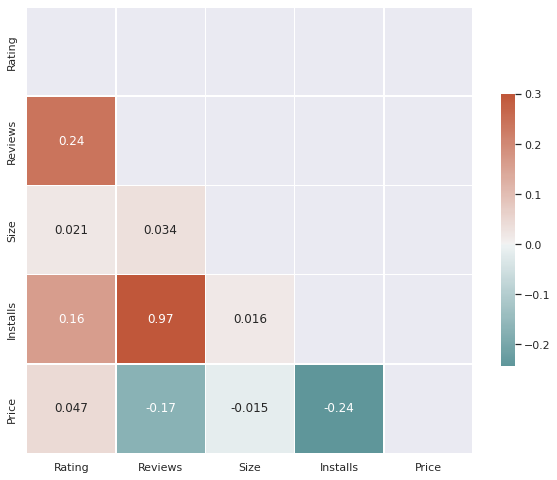

In [ ]:
corr = data.drop(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1).corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200, 21, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

### 4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


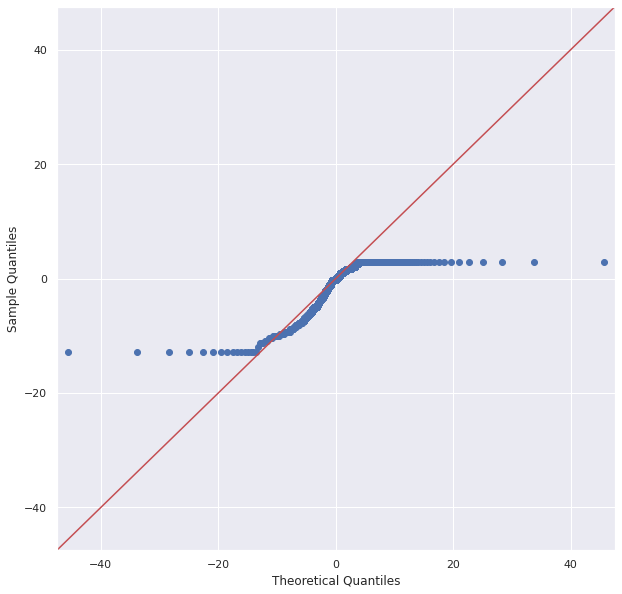

In [ ]:
import statsmodels.api as sm
from scipy import stats

fig, ax = plt.subplots(figsize=(10, 10))
fig = sm.qqplot(data['Rating'], stats.t, fit=True, line='45', ax=ax)
plt.show()

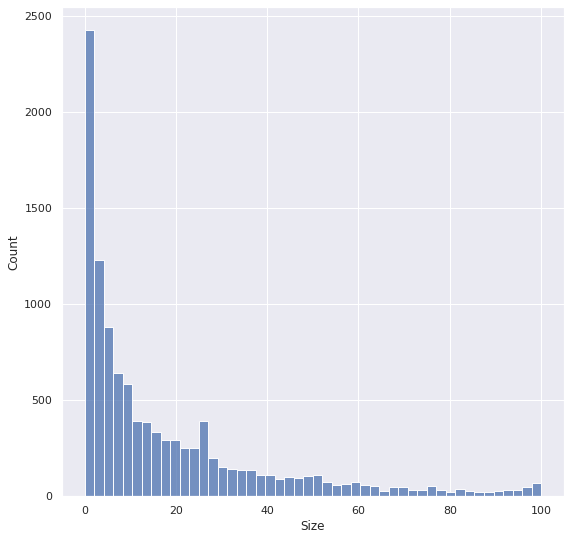

In [ ]:
sns.set(rc={"figure.figsize":(9, 9)})
sns.histplot(data['Size'])
plt.show()

### 5 Построить любой график (связанный с вашими данными) с помощью plotly

In [ ]:
! pip install plotly --upgrade

In [ ]:
import plotly.express as px 

px.scatter_matrix(data[["Installs", "Rating", "Reviews"]])